### Load Data

In [11]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [13]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Project 1/dataset/tweet.csv')
display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1815 entries, 0 to 1814
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  1815 non-null   int64 
 1   sentimen    1815 non-null   object
 2   tweet       1815 non-null   object
dtypes: int64(1), object(2)
memory usage: 42.7+ KB


None

In [14]:
display(df.head())

,Unnamed: 0,sentimen,tweet
0,0,negatif,Kata @prabowo Indonesia tidak dihargai bangsa ...
1,1,netral,"Batuan Langka, Tasbih Jokowi Hadiah dari Habib..."
2,2,netral,"Di era Jokowi, ekonomi Indonesia semakin baik...."
3,3,positif,"Bagi Sumatera Selatan, Asian Games berdampak p..."
4,4,negatif,Negara kita ngutang buat bngun infrastruktur y...


In [15]:
# Cek duplikat
df[df.duplicated()]

,Unnamed: 0,sentimen,tweet


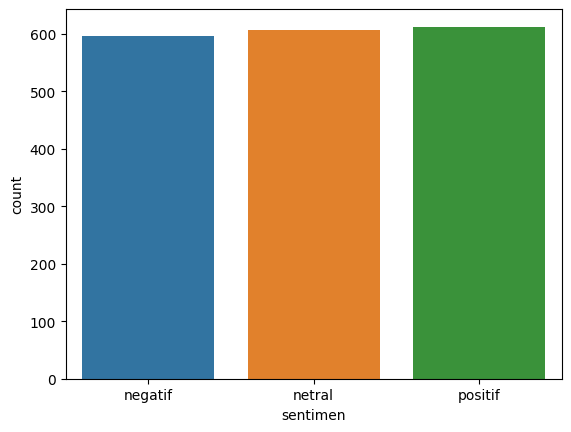

In [16]:
# Cek jumlah data
df['sentimen'].value_counts()

sns.countplot(x='sentimen', data=df)
plt.show()

### Text Cleaning

In [17]:
!pip install spacy
!python -m spacy download en_core_web_sm
!pip install beautifulsoup4
!pip install textblob

2023-11-05 12:07:53.453115: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-11-05 12:07:53.453173: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-11-05 12:07:53.453202: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-11-05 12:07:53.458844: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-11-05 12:07:54.343419: W tensorflow/compiler/

In [20]:
!pip install git+https://github.com/laxmimerit/preprocess_kgptalkie.git --upgrade --force-reinstall

  Cloning https://github.com/laxmimerit/preprocess_kgptalkie.git to /tmp/pip-req-build-qiv7x7cy
  Running command git clone --filter=blob:none --quiet https://github.com/laxmimerit/preprocess_kgptalkie.git /tmp/pip-req-build-qiv7x7cy
  Resolved https://github.com/laxmimerit/preprocess_kgptalkie.git to commit 96bf02872d9756f29d6cddb8aafaedcd2a39bbb4
  Preparing metadata (setup.py) ... done
  Created wheel for preprocess-kgptalkie: filename=preprocess_kgptalkie-0.1.3-py3-none-any.whl size=7603 sha256=527d43f23bf00db2f5187f0f7c1ee5c5518735c8e14153f4c153be8db002a6e3
  Stored in directory: /tmp/pip-ephem-wheel-cache-1ojiac50/wheels/5c/94/34/99d5ff65e88b8d9a6c5e8d8652f2311d87790a61a1b7466e21
Successfully built preprocess-kgptalkie


In [21]:
import pandas as pd
import numpy as np
import re
import preprocess_kgptalkie as ps

def get_clean(x):
    x = str(x).lower().replace('\\', '').replace('_', ' ')
    x = ps.remove_emails(x)
    x = ps.remove_urls(x)
    x = ps.remove_html_tags(x)
    x = ps.remove_rt(x)
    x = ps.remove_accented_chars(x)
    x = ps.remove_special_chars(x)
    x = re.sub("(.)\\1{2,}", "\\1", x)
    return x

In [22]:
df['tweet'] = df['tweet'].apply(get_clean)

/usr/local/lib/python3.10/dist-packages/preprocess_kgptalkie/utils.py:97: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  return BeautifulSoup(x, 'lxml').get_text().strip()


In [23]:
# Test
x = "😃Ini adalah contoh tweet dengan 😃 😃 😃 emoji!😃👌"
get_clean(x)

'ini adalah contoh tweet dengan emoji'

In [24]:
df.sample(5)

,Unnamed: 0,sentimen,tweet
1620,1620,netral,sementara menurut prabowo bumn adalah benteng ...
702,702,negatif,pak jokowi tolong kondisikan harga pringles or...
1006,1006,netral,adakah yang punya tulisan dari media atau apap...
976,976,netral,terkait penyataan prabowo ahy minta tetap harg...
795,795,netral,prabowo salahkan presiden sebelum jokowi ahy m...


### Convert Abbrevations

In [27]:
import csv
import pandas as pd

# Data singkatan dari https://github.com/meisaputri21/Indonesian-Twitter-Emotion-Dataset
indo_word_list = {}
with open('/content/drive/MyDrive/Colab Notebooks/Project 1/corpus/kamus_singkatan.csv', 'r', newline='') as wordlist_file:
    wordlist_reader = csv.reader(wordlist_file, delimiter=';')
    for row in wordlist_reader:
        if len(row) == 2:
            indo_word_list[row[0]] = row[1]

# Fungsi untuk mengganti singkatan dengan ekspansi penuh dari IndoWordList
def replace_abbreviations(text):
    words = text.split()
    for i, word in enumerate(words):
        if word in indo_word_list:
            words[i] = indo_word_list[word]
    return ' '.join(words)

# Preprocessing data singkatan pada kolom 'tweet'
df['tweet'] = df['tweet'].apply(replace_abbreviations)

In [28]:
df.iloc[1664]

Unnamed: 0                                                 1664
sentimen                                                negatif
tweet         sudah paham kan jokowi mengajak main game pant...
Name: 1664, dtype: object

### Convert Slang Words

In [29]:
import pandas as pd

# Data singkatan dari https://github.com/meisaputri21/Indonesian-Twitter-Emotion-Dataset
indo_word_list = {}
with open('/content/drive/MyDrive/Colab Notebooks/Project 1/corpus/kamusalay.csv', 'r', newline='') as wordlist_file:
    wordlist_reader = csv.reader(wordlist_file, delimiter=',')
    for row in wordlist_reader:
        if len(row) == 2:
            indo_word_list[row[0]] = row[1]

# Fungsi untuk mengganti singkatan dengan ekspansi penuh dari IndoWordList
def replace_slangs(text):
    words = text.split()
    for i, word in enumerate(words):
        if word in indo_word_list:
            words[i] = indo_word_list[word]
    return ' '.join(words)

# Preprocessing data singkatan pada kolom 'tweet'
df['tweet'] = df['tweet'].apply(replace_slangs)

In [30]:
# Test
x = "gw tau dah dia bsoq"
replace_slangs(x)

'saya tahu sudah dia besok'

## Stopword Removal

In [31]:
import pandas as pd
import nltk
nltk.download('punkt')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Download stopwords if not already downloaded
nltk.download('stopwords')

# Daftar kata-kata yang ingin dikecualikan
exceptions = ["tidak"]

def remove_stopwords(text):
  # get stopwords dictionary
  stop_words = set(stopwords.words('indonesian'))

  # case folding
  text_lowered = text.lower()

  # Tokenisasi kata-kata dalam teks
  words = word_tokenize(text_lowered)

  # Hapus stopwords, kecuali kata-kata yang dikecualikan
  cleaned_words = [word for word in words if word not in stop_words or word in exceptions]

  # Gabungkan kembali kata-kata yang tersisa
  cleaned_text = ' '.join(cleaned_words)
  return cleaned_text

df['tweet_no_stopwords'] = df['tweet'].apply(lambda x: remove_stopwords(str(x)))

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [32]:
df.sample(10)

,Unnamed: 0,sentimen,tweet,tweet_no_stopwords
1406,1406,positif,sudah seharusnya kok malah duluan saya ya memu...,duluan ya memutuskan memilih jokowi ekonomi in...
1656,1656,netral,komitmen prabowo sandi tidak mengambil gaji be...,komitmen prabowo sandi tidak mengambil gaji te...
903,903,netral,jokowi vs sandi debat ekonomi makro dan mikro ...,jokowi vs sandi debat ekonomi makro mikro pahami
69,69,positif,jokowi menjelaskan pembangunan dan merevitalis...,jokowi pembangunan merevitalisasi pasar rakyat...
1570,1570,positif,pasangan yang tidak kompak pak jokowi terlalu ...,pasangan tidak kompak jokowi menonjolkan penci...
940,940,netral,sandiuno prabowo mardanialisera fadlizon pak p...,sandiuno prabowo mardanialisera fadlizon prabo...
1044,1044,netral,ditanya soal esports oleh jokowi prabowo minta...,esports jokowi prabowo sandiaga idn times joko...
1167,1167,negatif,bro narasinya sedikit di jaga boleh lah sediki...,bro narasinya jaga baper prabowo subtansinya e...
1782,1782,netral,kita hargai kita hormati walaupun kami sedih m...,hargai hormati sedih maruf amin tolak hadiri k...
1716,1716,negatif,wkwkwkwkwkwkurang sadar alias siuman lama kare...,wkwkwkwkwkwkurang sadar alias siuman harga mah...


## Stemming

In [34]:
!pip install sastrawi
!pip install spacy
!pip install spacy-sastrawi

from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

# Create a stemmer instance
factory = StemmerFactory()
stemmer = factory.create_stemmer()

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 5.1 MB/s eta 0:00:00
ERROR: Could not find a version that satisfies the requirement spacy-sastrawi (from versions: none)
ERROR: No matching distribution found for spacy-sastrawi


In [35]:
# Test
x = df['tweet_no_stopwords'].iloc[1664]
print('before : ', x)

print('after : ', stemmer.stem(x))

before :  paham jokowi mengajak main game bacanya komik anak batasin main game prabowo mengajak kemandirian pangan sbb perut kenyangekonomi insyaallah negara aman main game tahan lapar aagympilihprabowo
after :  paham jokowi ajak main game baca komik anak batasin main game prabowo ajak mandiri pangan sbb perut kenyangekonomi insyaallah negara aman main game tahan lapar aagympilihprabowo


In [36]:
# Terapkan normalisasi pada kolom 'tweet_no_stopwords' dan simpan hasilnya di kolom 'stemming'
#df['stemming'] = df['tweet_no_stopwords'].apply(lambda x: stemmer.stem(str(x)))

#print(df)

In [38]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
import pandas as pd

# Buat objek stemmer Sastrawi
factory = StemmerFactory()
stemmer = factory.create_stemmer()

# Contoh data frame (df) Anda
# df = pd.read_csv('nama_file.csv')  # Gantilah dengan file CSV sesuai kebutuhan

# Tambahkan kolom 'stem' ke dalam DataFrame
df['stem'] = ''

# Loop untuk melakukan stemming pada setiap baris dalam kolom 'tweet_no_stopwords'
for i, tweet in enumerate(df['tweet_no_stopwords']):
    stemmed_tweet = stemmer.stem(tweet)
    df.at[i, 'stem'] = stemmed_tweet

    # Tampilkan progres per iterasi
    if (i + 1) % 100 == 0:
        print(f'Processed {i + 1} out of {len(df)} tweets')

# Tampilkan 5 baris pertama dari kolom 'stem' sebagai contoh
print(df['stem'].head())


Processed 100 out of 1815 tweets
Processed 200 out of 1815 tweets
Processed 300 out of 1815 tweets
Processed 400 out of 1815 tweets
Processed 500 out of 1815 tweets
Processed 600 out of 1815 tweets
Processed 700 out of 1815 tweets
Processed 800 out of 1815 tweets
Processed 900 out of 1815 tweets
Processed 1000 out of 1815 tweets
Processed 1100 out of 1815 tweets
Processed 1200 out of 1815 tweets
Processed 1300 out of 1815 tweets
Processed 1400 out of 1815 tweets
Processed 1500 out of 1815 tweets
Processed 1600 out of 1815 tweets
Processed 1700 out of 1815 tweets
Processed 1800 out of 1815 tweets
0    prabowo indonesia tidak harga bangsa asing ber...
1    batu langka tasbih jokowi hadiah habib luthfi ...
2    era jokowi ekonomi indonesia 01indonesiamaju j...
3    sumatera selatan asi games dampak ekonomi lang...
4    negara ngutang bangun infrastruktur pakai masy...
Name: stem, dtype: object


## Save Data

In [39]:
# Simpan DataFrame ke file CSV
df.to_csv('/content/drive/MyDrive/Colab Notebooks/Project 1/dataset/preprocessing.csv', index=False)